# Analysis Of Restaurant Ratings In Mexico By Consumers In 2012

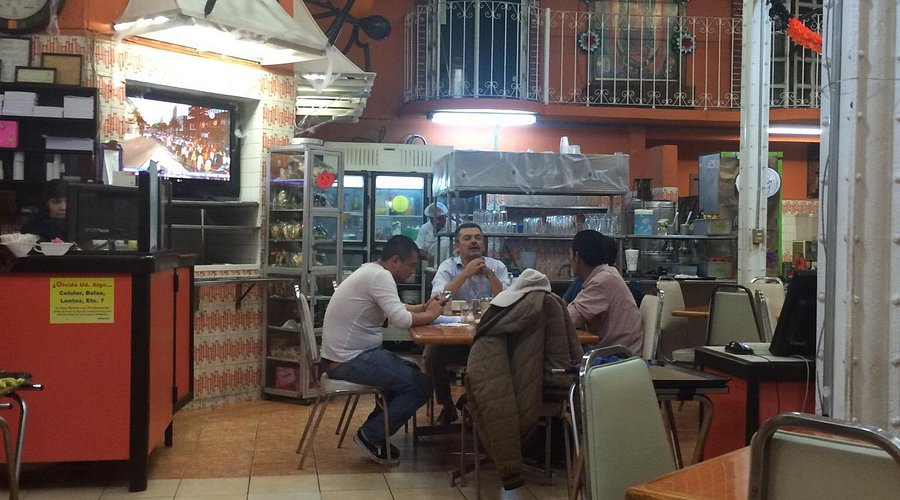

## For this project,I will be playing the role of a Researcher cum Consulant to a consortium of Firms that are looking at investing in the hospitality/Tourism sector in Mexico.As a Consultant,I will assist in providing answers to critical business decision by analysing datassets using Python powerful library called Pandas and Numpy.
## The given datasets contains 5 tables in csv format with a data dictionary table.They contain information about each restaurant and their cuisines, consumer and their preferences.
## The recommended analysis will help to answer the followings: 
## 1. The highest rated restaurants? Do consumer preferences have an effect on ratings? 
## 2. What are the consumer demographics? Does this indicate a bias in the data sample? 
## 3. Are there any demand & supply gaps that they can exploit in the market? 
## 4. If they were to invest in a restaurant, which characteristics should they be looking for?



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np


# Importing All The Five(5) Datasets

In [2]:
consumer_preferences = pd.read_csv('consumer_preferences.csv')
consumer_preferences

,Consumer_ID,Preferred_Cuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast
...,...,...
325,U1135,Southern
326,U1135,Ice Cream
327,U1136,Mexican
328,U1137,Mexican


In [3]:
consumers = pd.read_csv('consumers.csv')
consumers

,Consumer_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget
0,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,Independent,23,Student,Medium
1,U1002,San Luis Potosi,San Luis Potosi,Mexico,22.150087,-100.983325,No,Abstemious,Public,Single,Independent,22,Student,Low
2,U1003,San Luis Potosi,San Luis Potosi,Mexico,22.119847,-100.946527,No,Social Drinker,Public,Single,Independent,23,Student,Low
3,U1004,Cuernavaca,Morelos,Mexico,18.867000,-99.183000,No,Abstemious,Public,Single,Independent,72,Employed,Medium
4,U1005,San Luis Potosi,San Luis Potosi,Mexico,22.183477,-100.959891,No,Abstemious,Public,Single,Independent,20,Student,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,U1134,San Luis Potosi,San Luis Potosi,Mexico,22.149654,-100.998610,No,Casual Drinker,Public,Single,Independent,21,Student,Medium
134,U1135,San Luis Potosi,San Luis Potosi,Mexico,22.170396,-100.949936,No,Casual Drinker,On Foot,Single,Kids,24,Student,Low
135,U1136,San Luis Potosi,San Luis Potosi,Mexico,22.149607,-100.997235,Yes,Social Drinker,Car,Single,Independent,22,Student,Low
136,U1137,San Luis Potosi,San Luis Potosi,Mexico,22.144803,-100.944623,No,Social Drinker,Public,Single,Independent,23,Student,Low


In [4]:
restaurant_cuisines = pd.read_csv('restaurant_cuisines.csv')
restaurant_cuisines

,Restaurant_ID,Cuisine
0,132560,Regional
1,132572,Cafeteria
2,132583,American
3,132584,Mexican
4,132594,Mexican
...,...,...
107,135086,Fast Food
108,135088,Cafeteria
109,135104,Mexican
110,135106,Mexican


In [5]:
restaurants = pd.read_csv('restaurants.csv')
restaurants

,Restaurant_ID,Name,City,State,Country,Zip_Code,Latitude,Longitude,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking
0,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,NaN,Yes,Low,No,Open,Public
1,132561,Cafe Ambar,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.726819,-99.126506,NaN,No,Low,No,Closed,NaN
2,132564,Church's,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.730925,-99.145185,NaN,No,Low,No,Closed,NaN
3,132572,Cafe Chaires,San Luis Potosi,San Luis Potosi,Mexico,NaN,22.141647,-100.992712,NaN,No,Low,No,Closed,Yes
4,132583,McDonalds Centro,Cuernavaca,Morelos,Mexico,62000.0,18.922290,-99.234332,NaN,No,Low,Yes,Closed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,135088,Cafeteria Cenidet,Cuernavaca,Morelos,Mexico,NaN,18.876011,-99.219890,NaN,No,Low,No,Closed,Public
126,135104,Vips,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752982,-99.168434,Full Bar,No,Medium,Yes,Closed,Yes
127,135106,El Rincón De San Francisco,San Luis Potosi,San Luis Potosi,Mexico,78000.0,22.149709,-100.976093,Wine & Beer,Bar Only,Medium,No,Open,NaN
128,135108,Potzocalli,San Luis Potosi,San Luis Potosi,Mexico,NaN,22.136253,-100.933585,NaN,No,Low,No,Closed,NaN


In [6]:
ratings = pd.read_csv('ratings.csv')
ratings

,Consumer_ID,Restaurant_ID,Overall_Rating,Food_Rating,Service_Rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


# Data Cleaning

# Using Data Dictionary,Convert The Rating Grids To String & Drop The Grid Columns

In [10]:
condition_1 = [ratings['Overall_Rating'] == 0, ratings['Overall_Rating'] == 1, ratings['Overall_Rating'] == 2]
condition_2 = [ratings['Food_Rating'] == 0, ratings['Food_Rating'] == 1, ratings['Food_Rating'] == 2]
condition_3 = [ratings['Service_Rating'] == 0, ratings['Service_Rating'] == 1, ratings['Service_Rating'] == 2]
values =  ['Unsatisfactory', 'Satisfactory', 'Highly Satisfactory'] 
ratings['Overall'] = np.select(condition_1,values,'None')
ratings['Food'] = np.select(condition_2,values,'None')
ratings['Service'] = np.select(condition_3,values,'None')
ratings.drop(columns = ['Overall_Rating','Food_Rating','Service_Rating'],axis = 1,inplace = True)
ratings

,Consumer_ID,Restaurant_ID,Overall,Food,Service
0,U1077,135085,Highly Satisfactory,Highly Satisfactory,Highly Satisfactory
1,U1077,135038,Highly Satisfactory,Highly Satisfactory,Satisfactory
2,U1077,132825,Highly Satisfactory,Highly Satisfactory,Highly Satisfactory
3,U1077,135060,Satisfactory,Highly Satisfactory,Highly Satisfactory
4,U1068,135104,Satisfactory,Satisfactory,Highly Satisfactory
...,...,...,...,...,...
1156,U1043,132630,Satisfactory,Satisfactory,Satisfactory
1157,U1011,132715,Satisfactory,Satisfactory,Unsatisfactory
1158,U1068,132733,Satisfactory,Satisfactory,Unsatisfactory
1159,U1068,132594,Satisfactory,Satisfactory,Satisfactory


# Merging (restaurants, ratings, restaurant_cuisines) Dataframes

In [11]:
restaurants = restaurants.merge(ratings, on = 'Restaurant_ID', how = 'inner')
restaurants = restaurants.merge(restaurant_cuisines, on = 'Restaurant_ID', how = 'inner')
restaurants

,Restaurant_ID,Name,City,State,Country,Zip_Code,Latitude,Longitude,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking,Consumer_ID,Overall,Food,Service,Cuisine
0,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,NaN,Yes,Low,No,Open,Public,U1067,Satisfactory,Unsatisfactory,Unsatisfactory,Regional
1,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,NaN,Yes,Low,No,Open,Public,U1082,Unsatisfactory,Unsatisfactory,Unsatisfactory,Regional
2,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,NaN,Yes,Low,No,Open,Public,U1050,Unsatisfactory,Highly Satisfactory,Unsatisfactory,Regional
3,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,NaN,Yes,Low,No,Open,Public,U1087,Satisfactory,Highly Satisfactory,Satisfactory,Regional
4,132572,Cafe Chaires,San Luis Potosi,San Luis Potosi,Mexico,NaN,22.141647,-100.992712,NaN,No,Low,No,Closed,Yes,U1108,Satisfactory,Highly Satisfactory,Satisfactory,Cafeteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,135106,El Rincón De San Francisco,San Luis Potosi,San Luis Potosi,Mexico,78000.0,22.149709,-100.976093,Wine & Beer,Bar Only,Medium,No,Open,NaN,U1002,Satisfactory,Satisfactory,Satisfactory,Mexican
1039,135109,Paniroles,Cuernavaca,Morelos,Mexico,NaN,18.921785,-99.235350,Wine & Beer,No,Medium,No,Closed,NaN,U1030,Unsatisfactory,Unsatisfactory,Unsatisfactory,Italian
1040,135109,Paniroles,Cuernavaca,Morelos,Mexico,NaN,18.921785,-99.235350,Wine & Beer,No,Medium,No,Closed,NaN,U1020,Highly Satisfactory,Highly Satisfactory,Satisfactory,Italian
1041,135109,Paniroles,Cuernavaca,Morelos,Mexico,NaN,18.921785,-99.235350,Wine & Beer,No,Medium,No,Closed,NaN,U1051,Satisfactory,Satisfactory,Satisfactory,Italian


# Renaming ('Name','City','State' & 'Country')In Restaurants DataFrame

In [12]:
restaurants = restaurants.rename(columns = {'Name':'Restaurant_Name','City':'Restaurant_City','State':'Restaurant_State','Country':'Restaurant_Country',})
restaurants

,Restaurant_ID,Restaurant_Name,Restaurant_City,Restaurant_State,Restaurant_Country,Zip_Code,Latitude,Longitude,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking,Consumer_ID,Overall,Food,Service,Cuisine
0,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,NaN,Yes,Low,No,Open,Public,U1067,Satisfactory,Unsatisfactory,Unsatisfactory,Regional
1,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,NaN,Yes,Low,No,Open,Public,U1082,Unsatisfactory,Unsatisfactory,Unsatisfactory,Regional
2,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,NaN,Yes,Low,No,Open,Public,U1050,Unsatisfactory,Highly Satisfactory,Unsatisfactory,Regional
3,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,NaN,Yes,Low,No,Open,Public,U1087,Satisfactory,Highly Satisfactory,Satisfactory,Regional
4,132572,Cafe Chaires,San Luis Potosi,San Luis Potosi,Mexico,NaN,22.141647,-100.992712,NaN,No,Low,No,Closed,Yes,U1108,Satisfactory,Highly Satisfactory,Satisfactory,Cafeteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,135106,El Rincón De San Francisco,San Luis Potosi,San Luis Potosi,Mexico,78000.0,22.149709,-100.976093,Wine & Beer,Bar Only,Medium,No,Open,NaN,U1002,Satisfactory,Satisfactory,Satisfactory,Mexican
1039,135109,Paniroles,Cuernavaca,Morelos,Mexico,NaN,18.921785,-99.235350,Wine & Beer,No,Medium,No,Closed,NaN,U1030,Unsatisfactory,Unsatisfactory,Unsatisfactory,Italian
1040,135109,Paniroles,Cuernavaca,Morelos,Mexico,NaN,18.921785,-99.235350,Wine & Beer,No,Medium,No,Closed,NaN,U1020,Highly Satisfactory,Highly Satisfactory,Satisfactory,Italian
1041,135109,Paniroles,Cuernavaca,Morelos,Mexico,NaN,18.921785,-99.235350,Wine & Beer,No,Medium,No,Closed,NaN,U1051,Satisfactory,Satisfactory,Satisfactory,Italian


# Merging (consumers & consumer_preferences) & Drop Irrelevant Columns In (consumers)Dataframes

In [13]:
consumers = consumers.merge(consumer_preferences, on = 'Consumer_ID', how = 'inner')
consumers.drop(columns = ['Latitude','Longitude'],axis = 1,inplace = True	)
consumers

,Consumer_ID,City,State,Country,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget,Preferred_Cuisine
0,U1001,San Luis Potosi,San Luis Potosi,Mexico,No,Abstemious,On Foot,Single,Independent,23,Student,Medium,American
1,U1002,San Luis Potosi,San Luis Potosi,Mexico,No,Abstemious,Public,Single,Independent,22,Student,Low,Mexican
2,U1003,San Luis Potosi,San Luis Potosi,Mexico,No,Social Drinker,Public,Single,Independent,23,Student,Low,Mexican
3,U1004,Cuernavaca,Morelos,Mexico,No,Abstemious,Public,Single,Independent,72,Employed,Medium,Bakery
4,U1004,Cuernavaca,Morelos,Mexico,No,Abstemious,Public,Single,Independent,72,Employed,Medium,Breakfast
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,U1135,San Luis Potosi,San Luis Potosi,Mexico,No,Casual Drinker,On Foot,Single,Kids,24,Student,Low,Southern
326,U1135,San Luis Potosi,San Luis Potosi,Mexico,No,Casual Drinker,On Foot,Single,Kids,24,Student,Low,Ice Cream
327,U1136,San Luis Potosi,San Luis Potosi,Mexico,Yes,Social Drinker,Car,Single,Independent,22,Student,Low,Mexican
328,U1137,San Luis Potosi,San Luis Potosi,Mexico,No,Social Drinker,Public,Single,Independent,23,Student,Low,Mexican


In [14]:
consumers = consumers.rename(columns = {'City':'Consumers_City','State':'Consumers_State','Country':'Consumers_Country'})
consumers

,Consumer_ID,Consumers_City,Consumers_State,Consumers_Country,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget,Preferred_Cuisine
0,U1001,San Luis Potosi,San Luis Potosi,Mexico,No,Abstemious,On Foot,Single,Independent,23,Student,Medium,American
1,U1002,San Luis Potosi,San Luis Potosi,Mexico,No,Abstemious,Public,Single,Independent,22,Student,Low,Mexican
2,U1003,San Luis Potosi,San Luis Potosi,Mexico,No,Social Drinker,Public,Single,Independent,23,Student,Low,Mexican
3,U1004,Cuernavaca,Morelos,Mexico,No,Abstemious,Public,Single,Independent,72,Employed,Medium,Bakery
4,U1004,Cuernavaca,Morelos,Mexico,No,Abstemious,Public,Single,Independent,72,Employed,Medium,Breakfast
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,U1135,San Luis Potosi,San Luis Potosi,Mexico,No,Casual Drinker,On Foot,Single,Kids,24,Student,Low,Southern
326,U1135,San Luis Potosi,San Luis Potosi,Mexico,No,Casual Drinker,On Foot,Single,Kids,24,Student,Low,Ice Cream
327,U1136,San Luis Potosi,San Luis Potosi,Mexico,Yes,Social Drinker,Car,Single,Independent,22,Student,Low,Mexican
328,U1137,San Luis Potosi,San Luis Potosi,Mexico,No,Social Drinker,Public,Single,Independent,23,Student,Low,Mexican


# Merge (restaurants & consumers) Dataframes

In [15]:
df = restaurants.merge(consumers, on = 'Consumer_ID', how = 'inner')
df

,Restaurant_ID,Restaurant_Name,Restaurant_City,Restaurant_State,Restaurant_Country,Zip_Code,Latitude,Longitude,Alcohol_Service,Smoking_Allowed,...,Consumers_Country,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget,Preferred_Cuisine
0,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,NaN,Yes,...,Mexico,No,Abstemious,Public,Single,Independent,25,Student,Medium,Mexican
1,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,NaN,Yes,...,Mexico,Yes,Abstemious,Public,Single,NaN,23,Student,Medium,Mexican
2,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,NaN,Yes,...,Mexico,No,Social Drinker,Car,Single,Independent,23,Student,Medium,Mexican
3,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,NaN,Yes,...,Mexico,No,Abstemious,Public,Single,Independent,23,Student,Medium,Chinese
4,132572,Cafe Chaires,San Luis Potosi,San Luis Potosi,Mexico,NaN,22.141647,-100.992712,NaN,No,...,Mexico,No,Abstemious,Public,Single,Independent,29,Student,Medium,Coffee Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424,135106,El Rincón De San Francisco,San Luis Potosi,San Luis Potosi,Mexico,78000.0,22.149709,-100.976093,Wine & Beer,Bar Only,...,Mexico,No,Abstemious,Public,Single,Independent,22,Student,Low,Mexican
3425,135109,Paniroles,Cuernavaca,Morelos,Mexico,NaN,18.921785,-99.235350,Wine & Beer,No,...,Mexico,No,Casual Drinker,On Foot,Single,Independent,21,Student,Medium,Mexican
3426,135109,Paniroles,Cuernavaca,Morelos,Mexico,NaN,18.921785,-99.235350,Wine & Beer,No,...,Mexico,No,Abstemious,Public,Single,Independent,30,Employed,Medium,Mexican
3427,135109,Paniroles,Cuernavaca,Morelos,Mexico,NaN,18.921785,-99.235350,Wine & Beer,No,...,Mexico,No,Casual Drinker,Public,Single,Independent,33,Employed,Medium,Mexican


In [16]:
df.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Restaurant_City',
       'Restaurant_State', 'Restaurant_Country', 'Zip_Code', 'Latitude',
       'Longitude', 'Alcohol_Service', 'Smoking_Allowed', 'Price', 'Franchise',
       'Area', 'Parking', 'Consumer_ID', 'Overall', 'Food', 'Service',
       'Cuisine', 'Consumers_City', 'Consumers_State', 'Consumers_Country',
       'Smoker', 'Drink_Level', 'Transportation_Method', 'Marital_Status',
       'Children', 'Age', 'Occupation', 'Budget', 'Preferred_Cuisine'],
      dtype='object')

# Replace Missing Values & Drop Irrelevant Columns In Dataframe

In [17]:
df.fillna('None',inplace = True)
df.drop(columns = ['Zip_Code', 'Latitude','Longitude'],axis = 1,inplace = True)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_11684\170340609.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('None',inplace = True)


,Restaurant_ID,Restaurant_Name,Restaurant_City,Restaurant_State,Restaurant_Country,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,...,Consumers_Country,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget,Preferred_Cuisine
0,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,None,Yes,Low,No,Open,...,Mexico,No,Abstemious,Public,Single,Independent,25,Student,Medium,Mexican
1,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,None,Yes,Low,No,Open,...,Mexico,Yes,Abstemious,Public,Single,None,23,Student,Medium,Mexican
2,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,None,Yes,Low,No,Open,...,Mexico,No,Social Drinker,Car,Single,Independent,23,Student,Medium,Mexican
3,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,None,Yes,Low,No,Open,...,Mexico,No,Abstemious,Public,Single,Independent,23,Student,Medium,Chinese
4,132572,Cafe Chaires,San Luis Potosi,San Luis Potosi,Mexico,None,No,Low,No,Closed,...,Mexico,No,Abstemious,Public,Single,Independent,29,Student,Medium,Coffee Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424,135106,El Rincón De San Francisco,San Luis Potosi,San Luis Potosi,Mexico,Wine & Beer,Bar Only,Medium,No,Open,...,Mexico,No,Abstemious,Public,Single,Independent,22,Student,Low,Mexican
3425,135109,Paniroles,Cuernavaca,Morelos,Mexico,Wine & Beer,No,Medium,No,Closed,...,Mexico,No,Casual Drinker,On Foot,Single,Independent,21,Student,Medium,Mexican
3426,135109,Paniroles,Cuernavaca,Morelos,Mexico,Wine & Beer,No,Medium,No,Closed,...,Mexico,No,Abstemious,Public,Single,Independent,30,Employed,Medium,Mexican
3427,135109,Paniroles,Cuernavaca,Morelos,Mexico,Wine & Beer,No,Medium,No,Closed,...,Mexico,No,Casual Drinker,Public,Single,Independent,33,Employed,Medium,Mexican


# Analysis

# Total Number Of Restaurants = 95

In [18]:
Total_Number_Of_Restaurants = df['Restaurant_ID'].nunique()
Total_Number_Of_Restaurants

95

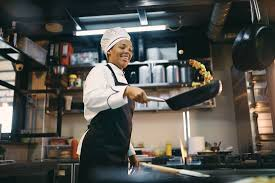,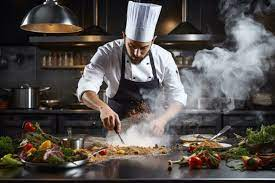

# Question 1. The highest rated restaurants? Do consumer preferences have an effect on ratings? 

## Comment:
## The best Restaurant is Cafeteria Y Restaurant El Pacifico because it is the most highly rated.It is located in the City of San Luis Potosi in a closed area,easily accessible by Public transport, Car and Foot. It serves the need of Medium, Low, and High networth Customers mostly students and single.
## Yes. A large proportion of Consumers gave commendable ratings based on getting served their preferred Cuisines.

In [19]:
Best_Restaurants = df[df['Overall'] == 'Highly Satisfactory']
Best_Restaurants.reset_index(drop = True, inplace = True)
Best_Restaurants



,Restaurant_ID,Restaurant_Name,Restaurant_City,Restaurant_State,Restaurant_Country,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,...,Consumers_Country,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget,Preferred_Cuisine
0,132572,Cafe Chaires,San Luis Potosi,San Luis Potosi,Mexico,None,No,Low,No,Closed,...,Mexico,No,Abstemious,Car,Married,Dependent,60,Employed,Medium,Breakfast
1,132572,Cafe Chaires,San Luis Potosi,San Luis Potosi,Mexico,None,No,Low,No,Closed,...,Mexico,No,Abstemious,None,None,None,31,None,None,Mexican
2,132572,Cafe Chaires,San Luis Potosi,San Luis Potosi,Mexico,None,No,Low,No,Closed,...,Mexico,No,Casual Drinker,Car,Single,Independent,23,Student,Low,American
3,132572,Cafe Chaires,San Luis Potosi,San Luis Potosi,Mexico,None,No,Low,No,Closed,...,Mexico,No,Casual Drinker,Car,Single,Independent,23,Student,Low,Mexican
4,132583,McDonalds Centro,Cuernavaca,Morelos,Mexico,None,No,Low,Yes,Closed,...,Mexico,No,Abstemious,Public,Single,Independent,20,Student,Medium,Mexican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,135106,El Rincón De San Francisco,San Luis Potosi,San Luis Potosi,Mexico,Wine & Beer,Bar Only,Medium,No,Open,...,Mexico,No,Casual Drinker,On Foot,Single,Independent,21,Student,Medium,Barbecue
866,135106,El Rincón De San Francisco,San Luis Potosi,San Luis Potosi,Mexico,Wine & Beer,Bar Only,Medium,No,Open,...,Mexico,No,Casual Drinker,On Foot,Single,Independent,21,Student,Medium,Polynesian
867,135106,El Rincón De San Francisco,San Luis Potosi,San Luis Potosi,Mexico,Wine & Beer,Bar Only,Medium,No,Open,...,Mexico,No,Casual Drinker,On Foot,Single,Independent,21,Student,Medium,Polish
868,135106,El Rincón De San Francisco,San Luis Potosi,San Luis Potosi,Mexico,Wine & Beer,Bar Only,Medium,No,Open,...,Mexico,Yes,Social Drinker,Car,Single,Independent,29,Employed,Medium,Mexican


In [20]:
Best = Best_Restaurants.groupby(['Restaurant_Name'])['Overall'].count().sort_values(ascending = False)
Best

Restaurant_Name
Cafeteria Y Restaurant El Pacifico    128
La Cantina Restaurante                 94
Tortas Locas Hipocampo                 34
La Posada Del Virrey                   29
Mariscos El Pescador                   28
                                     ... 
McDonalds Centro                        1
Restaurant Wu Zhuo Yi                   1
Tacos Correcaminos                      1
Taqueria El Amigo                       1
Tortas Y Hamburguesas El Gordo          1
Name: Overall, Length: 87, dtype: int64

In [21]:
Highest_Rated = df[df['Restaurant_Name'] == 'Cafeteria Y Restaurant El Pacifico']
Highest_Rated.reset_index(drop = True,inplace = True)
Highest_Rated

,Restaurant_ID,Restaurant_Name,Restaurant_City,Restaurant_State,Restaurant_Country,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,...,Consumers_Country,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget,Preferred_Cuisine
0,135032,Cafeteria Y Restaurant El Pacifico,San Luis Potosi,San Luis Potosi,Mexico,Wine & Beer,Smoking Section,Medium,No,Closed,...,Mexico,No,Abstemious,Public,Single,Independent,29,Student,Medium,Coffee Shop
1,135032,Cafeteria Y Restaurant El Pacifico,San Luis Potosi,San Luis Potosi,Mexico,Wine & Beer,Smoking Section,Medium,No,Closed,...,Mexico,No,Abstemious,Public,Single,Independent,29,Student,Medium,Sushi
2,135032,Cafeteria Y Restaurant El Pacifico,San Luis Potosi,San Luis Potosi,Mexico,Wine & Beer,Smoking Section,Medium,No,Closed,...,Mexico,No,Abstemious,Public,Single,Independent,29,Student,Medium,Latin American
3,135032,Cafeteria Y Restaurant El Pacifico,San Luis Potosi,San Luis Potosi,Mexico,Wine & Beer,Smoking Section,Medium,No,Closed,...,Mexico,No,Abstemious,Public,Single,Independent,29,Student,Medium,Deli
4,135032,Cafeteria Y Restaurant El Pacifico,San Luis Potosi,San Luis Potosi,Mexico,Wine & Beer,Smoking Section,Medium,No,Closed,...,Mexico,No,Abstemious,Public,Single,Independent,29,Student,Medium,Mexican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,135032,Cafeteria Y Restaurant El Pacifico,San Luis Potosi,San Luis Potosi,Mexico,Wine & Beer,Smoking Section,Medium,No,Closed,...,Mexico,No,Abstemious,Public,Single,Independent,23,Student,Low,Mexican
366,135032,Cafeteria Y Restaurant El Pacifico,San Luis Potosi,San Luis Potosi,Mexico,Wine & Beer,Smoking Section,Medium,No,Closed,...,Mexico,No,Social Drinker,Public,Single,Independent,21,Student,Medium,Mexican
367,135032,Cafeteria Y Restaurant El Pacifico,San Luis Potosi,San Luis Potosi,Mexico,Wine & Beer,Smoking Section,Medium,No,Closed,...,Mexico,No,Social Drinker,Public,Single,Independent,21,Student,Medium,Mexican
368,135032,Cafeteria Y Restaurant El Pacifico,San Luis Potosi,San Luis Potosi,Mexico,Wine & Beer,Smoking Section,Medium,No,Closed,...,Mexico,No,Casual Drinker,Public,Single,None,21,Student,None,Mexican


In [22]:
Preference = df.groupby(['Preferred_Cuisine','Overall'])['Overall'].count().sort_values(ascending = False)
Preference

Preferred_Cuisine  Overall            
Mexican            Highly Satisfactory    320
                   Satisfactory           262
                   Unsatisfactory         173
American           Satisfactory            36
Cafeteria          Unsatisfactory          36
                                         ... 
Polish             Satisfactory             1
Portuguese         Satisfactory             1
Polynesian         Satisfactory             1
Spanish            Satisfactory             1
Soup               Satisfactory             1
Name: Overall, Length: 198, dtype: int64

# Question 2. What are the consumer demographics? Does this indicate a bias in the data sample? 

## Comment:
## The Consumer demographics are spread between the cities of [Ciudad Victoria ,Cuernavaca ,Jiutepec ,San Luis Potosi].The highest rated Restaurants is located in the City of San Luis Potosi which has the highest number of Restaurants.This indicates a bias in the data sample due to un-even distribution of Restaurants.

In [23]:
Restaurant_Spread = df.groupby(['Consumers_City'])['Restaurant_ID'].nunique()

In [24]:
Restaurant_Spread

Consumers_City
Ciudad Victoria    25
Cuernavaca         32
Jiutepec           23
San Luis Potosi    62
Name: Restaurant_ID, dtype: int64

# Question 3. Are there any demand & supply gaps that they can exploit in the market? 

## Comment:
## Yes.There is a supply gap due to un-even distribution of Restaurants across the Consumer's demography. A breach of the supply gap will ultimately create effective demand.

# Question 4. If they were to invest in a restaurant, which characteristics should they be looking for?

## Comment:
## The Investors should look at starting a restaurant in cities like Ciudad Victoria ,Cuernavaca ,Jiutepec where there are few resturanrants and replicating all the characteristics and features found in the best restaurant,Cafeteria Y Restaurant El Pacifico. 